In [101]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

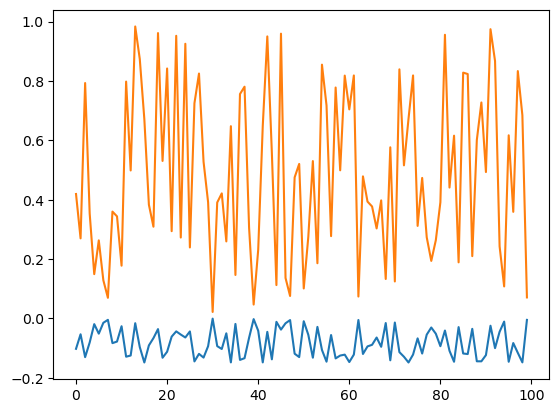

In [102]:
x = np.random.uniform(low=0,high=1,size=100)
t = [i**3 - i**2 for i in x]
t = np.array(t)

plt.plot(t)
plt.plot(x)
plt.show()

In [139]:
def ReLU_derivative(x):
    # CURRENTLY LINEAR. TURN INTO BOOLEAN
    return x 

class Layer(object):

    def __init__(self, n_inputs, n_units, layer_input, layer_preactivation = None, layer_activation = None, layer_index = 0):
        # self.W = tf.Variable(tf.random.uniform(shape=(n_inputs,n_units)))   # random weight matrix
        self.W = tf.Variable(tf.ones(shape=(n_inputs,n_units)))
        self.b = tf.Variable(tf.zeros(n_units))                               # biases of 0
        self.layer_input = tf.reshape(layer_input, shape = (1,n_inputs))      # reshape input for vector matrix multiplication
        self.layer_preactivation = layer_preactivation                      
        self.layer_activation = layer_activation


    def forward_step(self):
        self.layer_preactivation = tf.matmul(self.layer_input, self.W) + self.b     # multiply inputs with weights, add bias
        self.layer_activation = tf.nn.relu(self.layer_preactivation)                # apply activation function
        return self.layer_activation

    def backward_step(self):
        target = np.array([1,1,1,1]).astype(np.float32)
        learning_rate = 0.05
        # ADD POSSIBILITY TO DIFFERENTIATE BETWEEN OUTPUT LAYER AND HIDDEN LAYER
        bias_gradient = ReLU_derivative(self.layer_preactivation) * (self.layer_activation - target)
        weight_gradient = self.layer_input * bias_gradient
        input_gradient = bias_gradient @ tf.transpose(self.W)

        self.W = self.W - learning_rate * weight_gradient
        self.b = self.b - learning_rate * bias_gradient

In [147]:
class MLP(object):
    def __init__ (self, layer_units, network_input, layer_list = np.array([])):
        n_layers = len(layer_units)
        self.layer_list = layer_list

        for i in range(n_layers):
            if i == 0:              # first layer
                previous_layer = Layer(n_inputs=layer_units[i], n_units=layer_units[i], layer_input = network_input, layer_index = i)
                layer_list = np.append(layer_list,previous_layer)

            else:
                previous_layer = Layer(n_inputs = layer_units[i-1], n_units=layer_units[i], layer_input = previous_layer.forward_step(), layer_index = i)
                layer_list = np.append(layer_list,previous_layer)


    def forward_step():
        pass

In [123]:
inputs = (np.array((1,1,1,1))).astype(np.float32)
MLP(layer_units=[4,4,2],network_input=inputs)

In [152]:
inputs = (tf.Variable((1,1,1,1),dtype=tf.float32))
deutschland = Layer(n_inputs=4, n_units=4, layer_input=inputs)
print(deutschland.W)
print(deutschland.forward_step())
deutschland.backward_step()
deutschland.W,deutschland.b

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
tf.Tensor([[4. 4. 4. 4.]], shape=(1, 4), dtype=float32)


(<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[-0.6, -0.6, -0.6, -0.6]], dtype=float32)>)

In [129]:
inputs = (np.array((1,1,1,1)).astype(np.float32))
deutschland = Layer(n_inputs=4, n_units=4, layer_input=inputs)
print(deutschland.W)
print(deutschland.forward_step())
deutschland.backward_step()
deutschland.W,deutschland.b

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
tf.Tensor([[4. 4. 4. 4.]], shape=(1, 4), dtype=float32)


(<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998],
        [0.39999998, 0.39999998, 0.39999998, 0.39999998]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[-0.6, -0.6, -0.6, -0.6]], dtype=float32)>)

In [131]:
x = tf.Variable([[4, 4, 4, 4]], shape=(1, 4), dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=(1, 4) dtype=float32, numpy=array([[4., 4., 4., 4.]], dtype=float32)>

In [183]:
input = deutschland.layer_input 
preactivation = deutschland.layer_preactivation
activation = deutschland.layer_activation 
W = deutschland.W
target = np.array([1,1,1,1]).astype(np.float32)
learning_rate = 0.05

bias_gradient = (tf.nn.sigmoid(preactivation) * (1-tf.nn.sigmoid(preactivation))) * (activation - target)
weight_gradient = input * bias_gradient
input_gradient = bias_gradient @ tf.transpose(W)

deutschland.W = W - learning_rate * weight_gradient
deutschland.b = deutschland.b - learning_rate * bias_gradient

deutschland.W, deutschland.b

# bias_gradient = (tf.nn.sigmoid(self.layer_preactivation) * (1-tf.nn.sigmoid(self.layer_preactivation))) * (self.layer_activation - target)
#         weight_gradient = self.layer_input * bias_gradient
#         input_gradient = bias_gradient @ tf.transpose(self.W)



(<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[0.99997956, 0.9999591 , 0.99993867, 0.9999182 ],
        [0.99997956, 0.9999591 , 0.99993867, 0.9999182 ],
        [0.99997956, 0.9999591 , 0.99993867, 0.9999182 ],
        [0.99997956, 0.9999591 , 0.99993867, 0.9999182 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[-2.0437505e-05, -2.0437505e-05, -2.0437505e-05, -2.0437505e-05]],
       dtype=float32)>)